In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import csv
from scipy.stats import pearsonr
import glob

In [25]:
def get_domain_df(data_csv):
    data = []
    with open(data_csv, 'r') as file:
        csv_reader = csv.reader(file, delimiter=',')
        for row in csv_reader:
            if row[0] == '':
                continue
            l1 = row[1]
            l2 = row[2]
            alignment = float(row[3])
            w1 = row[4]
            w2 = row[5]
            domain = row[16]
            data.append(dict(l1=l1, 
                             l2=l2, 
                             alignment=alignment, 
                             w1=w1, 
                             w2=w2, 
                             domain=domain))

    lin_data = []
    files = glob.glob('../compute-alignment/w=*')
    for fn in files:
        with open(fn, 'r') as file:
            langs = fn.replace('../compute-alignment/w=', '').split('.')[0].split('-')
            l1, l2 = langs
            csv_reader = csv.reader(file, delimiter=',')
            csv_reader = list(csv_reader)
            n_rows = len(csv_reader)
            if n_rows > 600:
                for row in csv_reader:
                    if row[0] == 'l1':
                        continue
                    w1 = row[2]
                    w2 = row[3]
                    alignment = float(row[4])
                    lin_data.append(dict(l1=l1, 
                                         l2=l2,
                                         w1=w1,
                                         w2=w2,
                                         linear_alignment=alignment))

    lin_df = pd.DataFrame(lin_data)

    df = pd.DataFrame(data)

    df = pd.merge(df, lin_df, how='left', on=['l1', 'l2', 'w1', 'w2'])
    df = df[df['linear_alignment'].notnull()]
#     df = df.groupby('domain').mean()
#     df = df.sort_values(by='alignment')

#     df = df.sort_values(by='linear_alignment')
    
    return df

lang_map = dict()
reverse_lang_map = dict()
with open('data/distances/FAIR_languages_glotto_xdid.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader: 
        if row[0] == 'Language':
            continue
        full = row[0]
        short = row[8]
        lang_map[short] = full
        reverse_lang_map[full] = short
        
lang_dist_data = []
with open('data/distances/geographic_long.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader: 
        if row[0] == 'name_l1':
            continue
        l1, l2 = row[0], row[1]
        if l1 in reverse_lang_map and l2 in reverse_lang_map:
            lang_dist_data.append(dict(l1=reverse_lang_map[l1],
                                       l2=reverse_lang_map[l2],
                                       geo_dist=float(row[2])))
lang_df = pd.DataFrame(lang_dist_data)

hist_dist_data = []
with open('data/distances/IndoEuropean_historical_distances_long.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader: 
        if row[0] == 'name_l1':
            continue
        l1, l2 = row[0], row[1]
        if l1 in reverse_lang_map and l2 in reverse_lang_map:
            hist_dist_data.append(dict(l1=reverse_lang_map[l1],
                                       l2=reverse_lang_map[l2],
                                       hist_dist=float(row[2])))
hist_df = pd.DataFrame(hist_dist_data)
hist_df

,l1,l2,hist_dist
0,fur,fur,0.000000
1,it,fur,1137.448482
2,rm,fur,1807.236963
3,wa,fur,3133.685506
4,fr,fur,3133.685506
...,...,...,...
5036,os,hy,13663.905835
5037,sq,hy,13663.905835
5038,el,hy,13663.905835
5039,hy,hy,2404.514177


In [29]:
df = get_domain_df('../alignments-nel-wiki-trl.csv')
df = pd.merge(df, lang_df, how='left', on=['l1', 'l2'])
df = pd.merge(df, hist_df, how='left', on=['l1', 'l2'])

In [33]:
df_geo = df.groupby(['l1', 'l2']).mean().reset_index()
df_geo = df_geo[df_geo['geo_dist'].notnull()]
df_geo

,l1,l2,alignment,linear_alignment,geo_dist,hist_dist
0,ar,zh,0.195731,-0.003098,6633.066447,NaN
1,az,ar,0.244975,-0.002605,1469.041046,NaN
2,az,ba,0.239058,-0.002337,1594.282237,NaN
3,az,ce,0.154542,-0.002532,291.698492,NaN
4,az,eu,0.267684,-0.002555,3899.520236,NaN
...,...,...,...,...,...,...
1448,uk,ta,0.289340,-0.002303,6550.219586,NaN
1449,uk,te,0.287980,-0.002166,6039.725352,NaN
1450,uk,tr,0.330023,-0.002283,1145.421165,NaN
1451,uk,tt,0.249455,-0.002363,1913.105996,NaN


In [34]:
df_hist = df.groupby(['l1', 'l2']).mean().reset_index()
df_hist = df_hist[df_hist['hist_dist'].notnull()]
df_hist

,l1,l2,alignment,linear_alignment,geo_dist,hist_dist
34,be,br,0.229097,-0.002282,2127.199266,11416.208215
35,be,ca,0.323005,-0.002204,2219.830793,11416.208215
37,be,cy,0.204561,-0.002506,1991.293860,11416.208215
38,be,da,0.302120,-0.002316,1074.441578,11416.208215
39,be,de,0.300794,-0.002188,1050.974305,11416.208215
...,...,...,...,...,...,...
1442,uk,no,0.321523,-0.002265,NaN,11416.208215
1443,uk,pt,0.346874,-0.002166,2734.129288,11416.208215
1444,uk,ro,0.311874,-0.002350,199.077270,11416.208215
1445,uk,ru,0.507305,-0.001506,2056.316716,1910.991142


Alignment correlation with distance: -0.3367646866337185


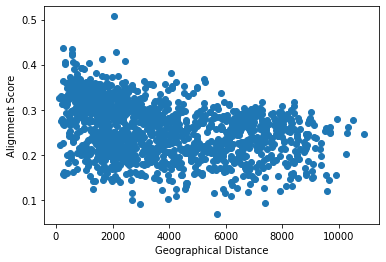

In [39]:
alignments = df_geo['alignment'].to_numpy()
dist = df_geo['geo_dist'].to_numpy()

plt.scatter(dist, alignments)
plt.xlabel('Geographical Distance')
plt.ylabel('Alignment Score')
plt.savefig('nn_geo.pdf')
print('Alignment correlation with distance:', pearsonr(dist, alignments)[0])

Orthogonal alignment correlation with distance: -0.3548807596849096


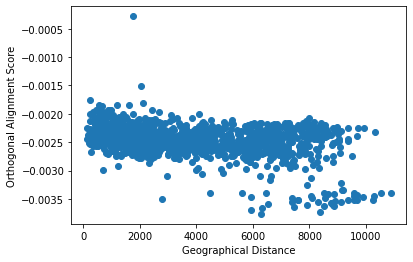

In [40]:
alignments = df_geo['linear_alignment'].to_numpy()
dist = df_geo['geo_dist'].to_numpy()

plt.scatter(dist, alignments)
plt.xlabel('Geographical Distance')
plt.ylabel('Orthogonal Alignment Score')
plt.savefig('ortho_geo.pdf')
print('Orthogonal alignment correlation with distance:', pearsonr(dist, alignments)[0])

Alignment correlation with hist distance: -0.22770651419980403


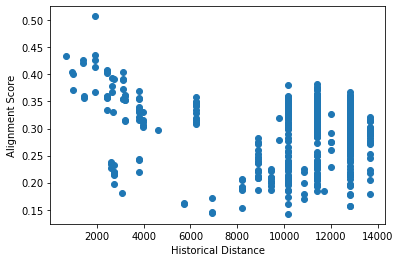

In [42]:
alignments = df_hist['alignment'].to_numpy()
dist = df_hist['hist_dist'].to_numpy()

plt.scatter(dist, alignments)
plt.xlabel('Historical Distance')
plt.ylabel('Alignment Score')
plt.savefig('nn_hist.pdf')
print('Alignment correlation with hist distance:', pearsonr(dist, alignments)[0])

Orthogonal alignment correlation with hist distance: -0.2850482895109194


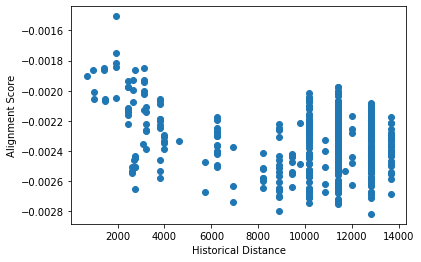

In [43]:
alignments = df_hist['linear_alignment'].to_numpy()
dist = df_hist['hist_dist'].to_numpy()

plt.scatter(dist, alignments)
plt.xlabel('Historical Distance')
plt.ylabel('Alignment Score')
plt.savefig('ortho_hist.pdf')
print('Orthogonal alignment correlation with hist distance:', pearsonr(dist, alignments)[0])